# Principal component analysis (PCA) on cancer data

This notebook illustrates how to use the **hoggorm** package to carry out principal component analysis (PCA) on a multivariate data set on cancer in men across OECD countries. Furthermore, we will learn how to visualize the results of the PCA using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [1]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

Next, load the cancer data that we are going to analyse using **hoggorm**. The data can be acquired from the OECD (The Organisation for Economic Co-operation and Development) and holds the percentages of various cancer types in men. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [2]:
# Load OECD data for cancer in men

# Insert code for reading data from other folder in repository instead of directly from same repository.
data_df = pd.read_csv('Cancer_men_perc.txt', index_col=0, sep='\t')
data_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
MEN,,,,,,,,,,
Australia,20.493429,9.290024,2.954790,5.033474,13.612695,4.049921,0.157038,3.855691,3.107695,4.425986
Austria,22.286929,10.944722,4.584951,6.627842,10.574968,5.666482,0.147902,3.780736,3.031984,1.941209
Belgium,30.090706,10.450900,3.253582,5.179440,9.162613,3.450769,0.144604,3.569081,4.719337,1.018798
Canada,27.731624,11.443416,3.011842,5.419733,9.739695,3.863702,0.195163,3.789857,3.534035,1.537569
Chile,13.304823,8.022491,17.272511,4.165677,16.195454,5.044745,0.221747,3.009424,2.162034,0.554368
Czech Rep.,24.875324,13.970344,4.455083,6.742470,9.455416,3.464326,0.279274,3.371235,3.557417,1.522708
Denmark,24.311585,12.168196,3.212602,6.375589,14.301662,3.162987,0.210866,3.100968,4.366162,2.245100
Estonia,26.371951,10.264228,8.333333,5.436992,13.008130,2.388211,0.101626,3.861789,3.506098,1.016260
Finland,23.917887,9.818587,4.169319,7.940802,13.574157,4.232973,0.159134,2.737110,2.928071,2.418842


Let's have a look at the dimensions of the data frame.

In [3]:
np.shape(data_df)

(35, 10)

There are observations for 34 countries as well as all OECD countries together, which results in 35 rows. Furthermore, there are 10 columns where each column represents one type of cancer in men.

The ``nipalsPCA`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frame holding the imported data needs to be "taken apart" into three parts: 
* a numpy array holding the numeric values
* a Python list holding variable (column) names
* a Python list holding object (row) names. 

The array with values will be used as input for the ``nipalsPCA`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualizing the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [4]:
# Get the values from the data frame
data = data_df.values

# Get the variable or columns names
data_varNames = list(data_df.columns)

# Get the object or row names
data_objNames = list(data_df.index)

Let's have a quick look at the column or variable names.

In [5]:
data_varNames

['Trachea-bronchus-lung',
 'Colon, rectum and anus',
 'Stomach',
 'Pancreas',
 'Prostate',
 'Liver',
 'Hodgkins disease',
 'Leukemia',
 'Bladder',
 'Skin']

Now show the object or row names.

In [6]:
data_objNames

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Chile',
 'Czech Rep.',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Rep.',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'OECD']

---

### Apply PCA to our data

Now, let's run PCA on the data using the ``nipalsPCA`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/pca.html). Using input parameter ``arrX`` we define which numpy array we would like to analyse. By setting input parameter ``Xstand=False`` we make sure that the variables are only mean centered, not scaled to unit variance. This is the default setting and actually doesn't need to expressed explicitly. Setting parameter ``cvType=["loo"]`` we make sure that we compute the PCA model using full cross validation. ``"loo"`` means "Leave One Out". By setting parameter ``numpComp=4`` we ask for four principal components (PC) to be computed.

In [7]:
model = ho.nipalsPCA(arrX=data, Xstand=False, cvType=["loo"], numComp=4)

loo


That's it, the PCA model has been computed. Now we would like to inspect the results by visualising them. We can do this using the taylor-made plotting function for PCA from the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input parameters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

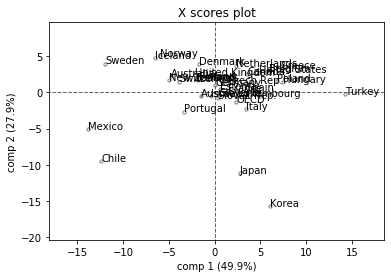

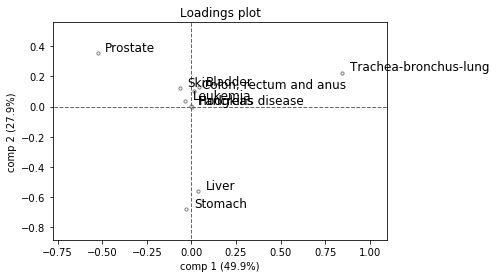

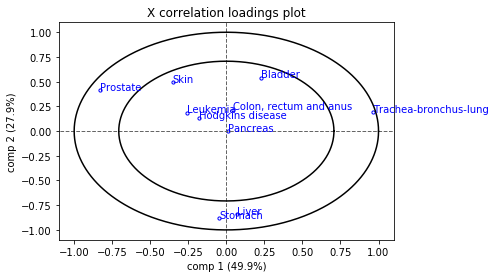

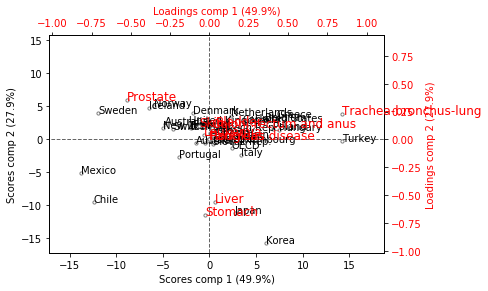

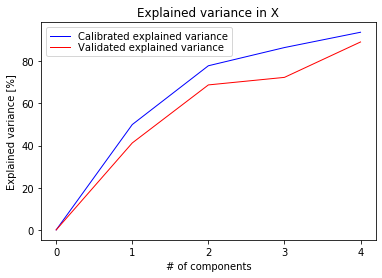

In [8]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=data_objNames, 
         XvarNames=data_varNames)

---

### Accessing numerical results

Now that we have visualized the PCA results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [9]:
# Get scores and store in numpy array
scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
scores_df = pd.DataFrame(model.X_scores())
scores_df.index = data_objNames
scores_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_scores().shape[1])]
scores_df

,PC1,PC2,PC3,PC4
Australia,-4.804277,2.310263,-0.320919,2.835885
Austria,-1.491013,-0.521756,-1.669103,1.558577
Belgium,5.930459,2.930098,0.758349,1.199125
Canada,3.580658,2.560206,-0.593118,1.027471
Chile,-12.382151,-9.441836,6.727705,-3.070356
Czech Rep.,1.319773,1.315515,-2.350299,-1.668611
Denmark,-1.711772,3.914209,0.076722,0.251714
Estonia,0.524115,0.435027,4.308677,-1.262844
Finland,-1.741210,1.886170,0.830626,2.085349
France,1.435297,0.232770,-1.275385,2.792210


In [10]:
help(ho.nipalsPCA.X_scores)

Help on function X_scores in module hoggorm.pca:

X_scores(self)
    Returns array holding scores T. First column holds scores for
    component 1, second column holds scores for component 2, etc.



In [11]:
# Dimension of the scores
np.shape(model.X_scores())

(35, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [12]:
# Get loadings and store in numpy array
loadings = model.X_loadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_loadings())
loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4
Trachea-bronchus-lung,0.845199,0.224593,0.314566,0.046389
"Colon, rectum and anus",0.015660,0.106296,-0.550679,-0.668953
Stomach,-0.027941,-0.680376,0.498526,-0.471499
Pancreas,0.001799,-0.000626,-0.141297,0.084208
Prostate,-0.525513,0.354902,0.453070,0.086309
Liver,0.035896,-0.562988,-0.327117,0.518504
Hodgkins disease,-0.005208,0.005020,0.015071,0.003083
Leukemia,-0.036068,0.034901,0.010028,0.165016
Bladder,0.040952,0.128914,-0.023781,-0.107264
Skin,-0.064443,0.120724,-0.127032,0.076852


In [13]:
help(ho.nipalsPCA.X_loadings)

Help on function X_loadings in module hoggorm.pca:

X_loadings(self)
    Returns array holding loadings P of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [14]:
np.shape(model.X_loadings())

(10, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [15]:
# Get loadings and store in numpy array
loadings = model.X_corrLoadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_corrLoadings())
loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4
Trachea-bronchus-lung,0.965908,0.191746,0.149441,0.020209
"Colon, rectum and anus",0.043048,0.218298,-0.629289,-0.701062
Stomach,-0.048240,-0.877575,0.357808,-0.310349
Pancreas,0.010313,-0.002680,-0.336703,0.184027
Prostate,-0.829307,0.418408,0.297220,0.051922
Liver,0.071639,-0.839369,-0.271383,0.394491
Hodgkins disease,-0.180713,0.130129,0.217384,0.040783
Leukemia,-0.258370,0.186778,0.029859,0.450652
Bladder,0.230094,0.541118,-0.055545,-0.229764
Skin,-0.352154,0.492845,-0.288573,0.160107


In [16]:
help(ho.nipalsPCA.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.pca:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [17]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,49.949783
PC2,27.877279
PC3,8.631727
PC4,7.259616


In [18]:
help(ho.nipalsPCA.X_calExplVar)

Help on function X_calExplVar in module hoggorm.pca:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [19]:
# Get cumulative calibrated explained variance
cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance and store in pandas dataframe with row and column names
cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
cumCalExplVar_df.columns = ['cumulative calibrated explained variance']
cumCalExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_df

,cumulative calibrated explained variance
PC0,0.000000
PC1,49.949783
PC2,77.827062
PC3,86.458789
PC4,93.718405


In [20]:
help(ho.nipalsPCA.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pca:

X_cumCalExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [21]:
# Get cumulative calibrated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable and store in pandas dataframe with row and column names
cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
cumCalExplVar_ind_df.columns = data_varNames
cumCalExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_ind_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,93.297874,0.185312,0.232708,0.010637,68.775042,0.513211,3.265701,6.675528,5.294306,12.401232
PC2,96.974604,4.950729,77.246454,0.011355,86.281381,70.967161,4.959056,10.164105,34.575287,36.690812
PC3,99.207876,44.551154,90.049020,11.348255,95.115368,78.332080,9.684653,10.253262,34.883801,45.018208
PC4,99.248721,93.700489,99.680558,14.734767,95.384980,93.894274,9.850987,30.561992,40.162969,47.581571


In [22]:
help(ho.nipalsPCA.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.pca:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [23]:
# Get calibrated predicted X for a given number of components

# Predicted X from calibration using 1 component
X_from_1_component = model.X_predCal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_df = pd.DataFrame(model.X_predCal()[1])
X_from_1_component_df.index = data_objNames
X_from_1_component_df.columns = data_varNames
X_from_1_component_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
Australia,20.264145,11.348532,5.914738,5.710003,13.528109,4.394810,0.250634,3.612515,3.604950,1.980947
Austria,23.064511,11.400417,5.822161,5.715964,11.786947,4.513742,0.233378,3.493013,3.740634,1.767432
Belgium,29.337131,11.516635,5.614795,5.729317,7.886869,4.780140,0.194727,3.225336,4.044555,1.289172
Canada,27.351081,11.479838,5.680452,5.725089,9.121720,4.695792,0.206965,3.310089,3.948327,1.440599
Chile,13.859335,11.229864,6.126475,5.696369,17.510377,4.122798,0.290101,3.885833,3.294624,2.469286
Czech Rep.,25.440185,11.444433,5.743624,5.721021,10.309843,4.614636,0.218740,3.391634,3.855740,1.586297
Denmark,22.877926,11.396960,5.828329,5.715567,11.902959,4.505817,0.234528,3.500975,3.731593,1.781658
Estonia,24.767695,11.431973,5.765856,5.719590,10.727972,4.586076,0.222883,3.420331,3.823156,1.637571
Finland,22.853045,11.396499,5.829152,5.715514,11.918429,4.504761,0.234682,3.502037,3.730388,1.783555
France,25.537825,11.446242,5.740396,5.721229,10.249134,4.618783,0.218138,3.387467,3.860471,1.578852


In [24]:
# Get predicted X for a given number of components

# Predicted X from calibration using 4 components
X_from_4_component = model.X_predCal()[4]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_4_component_df = pd.DataFrame(model.X_predCal()[4])
X_from_4_component_df.index = data_objNames
X_from_4_component_df.columns = data_varNames
X_from_4_component_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
Australia,20.813615,9.873754,2.845786,5.992706,14.447389,4.669554,0.266138,4.157895,3.606217,2.518563
Austria,22.494585,11.221481,4.610192,6.083374,10.980075,6.161605,0.210409,3.715255,3.545885,2.036253
Belgium,30.289386,10.608328,3.433897,5.721306,9.373847,3.504211,0.224562,3.533081,4.275626,1.638726
Canada,27.787173,11.391266,3.158412,5.893813,9.850298,3.981193,0.214046,3.563045,4.182266,1.903987
Chile,13.712647,8.575350,17.352077,4.493128,16.942574,5.645705,0.334629,3.117106,2.246791,0.238829
Czech Rep.,24.918911,13.994751,4.463644,5.911778,9.567855,3.777658,0.184778,3.138631,4.260203,1.915438
Denmark,23.792840,11.602391,3.084761,5.723473,13.348603,2.407581,0.256110,3.679893,4.207363,2.263796
Estonia,26.162181,9.950300,8.213290,5.004174,12.725499,2.276930,0.286110,3.270333,3.912231,1.045696
Finland,23.634688,9.744582,3.976695,5.772572,13.144150,4.252419,0.263098,3.920313,3.730104,2.066009
France,25.318437,10.305455,3.629688,6.136417,9.994900,6.352708,0.208694,3.843561,3.621303,1.983556


In [25]:
help(ho.nipalsPCA.X_predCal)

Help on function X_predCal in module hoggorm.pca:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [26]:
# Get validated explained variance of each component
valExplVar = model.X_valExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
valExplVar_df = pd.DataFrame(model.X_valExplVar())
valExplVar_df.columns = ['validated explained variance']
valExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
valExplVar_df

,validated explained variance
PC1,41.228104
PC2,27.515848
PC3,3.577173
PC4,16.787521


In [27]:
help(ho.nipalsPCA.X_valExplVar)

Help on function X_valExplVar in module hoggorm.pca:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [28]:
# Get cumulative validated explained variance
cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance and store in pandas dataframe with row and column names
cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
cumValExplVar_df.columns = ['cumulative validated explained variance']
cumValExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_df

,cumulative validated explained variance
PC0,0.000000
PC1,41.228104
PC2,68.743952
PC3,72.321125
PC4,89.108645


In [29]:
help(ho.nipalsPCA.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.pca:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component.



In [30]:
# Get cumulative validated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable and store in pandas dataframe with row and column names
cumValExplVar_ind_df = pd.DataFrame(model.X_cumValExplVar_indVar())
cumValExplVar_ind_df.columns = data_varNames
cumValExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_ind_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,90.824851,-17.145967,-19.815931,-5.240408,62.379405,-10.961539,-9.643134,-5.138706,-6.705916,2.898408
PC2,95.904674,-17.188115,63.295538,-15.408414,84.244357,41.440343,-17.843876,-15.248051,28.054297,26.713650
PC3,97.104389,1.232204,67.630816,-10.748362,90.128127,40.872884,-17.770772,-23.139446,24.826724,34.032033
PC4,98.475855,88.493629,99.498470,-12.666695,91.756606,79.683951,-33.877348,-18.734551,24.589304,31.520312


In [31]:
help(ho.nipalsPCA.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.pca:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [32]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 1 component
X_from_1_component_val = model.X_predVal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_val_df = pd.DataFrame(model.X_predVal()[1])
X_from_1_component_val_df.index = data_objNames
X_from_1_component_val_df.columns = data_varNames
X_from_1_component_val_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
Australia,20.346812,11.452455,6.105403,5.743157,13.435601,4.446251,0.254297,3.591813,3.628411,1.842250
Austria,23.098502,11.415033,5.860404,5.687173,11.820143,4.476746,0.236020,3.483532,3.763559,1.761308
Belgium,29.146256,11.573484,5.847552,5.763295,7.834264,4.924500,0.197677,3.203712,3.982234,1.300025
Canada,27.278466,11.477010,5.818147,5.737198,9.114227,4.747381,0.207564,3.290940,3.958260,1.435539
Chile,17.147842,11.842768,3.732281,5.903233,16.242627,3.460482,0.284343,3.913106,3.740709,2.648065
Czech Rep.,25.441970,11.365015,5.785915,5.689270,10.345341,4.651024,0.216961,3.392898,3.863856,1.589068
Denmark,22.877615,11.371955,5.918591,5.694592,11.791892,4.557505,0.234934,3.511302,3.712101,1.761700
Estonia,24.709957,11.466478,5.690023,5.727979,10.666493,4.650982,0.226537,3.407674,3.832053,1.656775
Finland,22.845354,11.447777,5.885934,5.644067,11.845279,4.517876,0.236904,3.525032,3.756839,1.760221
France,25.536053,11.486346,5.816234,5.733147,10.269548,4.560135,0.220550,3.383306,3.844408,1.594376


In [33]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 3 components
X_from_3_component_val = model.X_predVal()[3]

# Predicted X from calibration using 3 components stored in pandas data frame with row and columns names
X_from_3_component_val_df = pd.DataFrame(model.X_predVal()[3])
X_from_3_component_val_df.index = data_objNames
X_from_3_component_val_df.columns = data_varNames
X_from_3_component_val_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
Australia,20.764530,11.883816,4.351302,5.783851,14.210242,3.152660,0.263723,3.671416,3.953540,2.148731
Austria,22.479761,12.312983,5.506251,5.888952,10.919635,5.230857,0.210053,3.425437,3.753513,1.886682
Belgium,30.212489,11.532262,4.064188,5.660435,9.259651,2.843325,0.225970,3.310212,4.379648,1.592228
Canada,27.738536,12.108949,3.703828,5.823744,9.773033,3.415657,0.211989,3.369483,4.333096,1.835485
Chile,13.075733,9.646726,8.913721,6.307958,13.900808,10.670921,0.264012,4.068782,2.150252,1.824376
Czech Rep.,25.098286,12.488010,3.669759,5.987947,9.881577,4.755909,0.189882,3.458486,4.077980,2.054321
Denmark,23.748048,11.746771,3.217476,5.663136,13.257003,2.235640,0.257956,3.669418,4.224329,2.241527
Estonia,25.977504,8.716484,6.600062,5.281250,12.517250,3.840790,0.301266,3.609970,3.712430,1.346756
Finland,23.484804,11.287266,4.966832,5.517355,12.847988,3.179513,0.258285,3.601377,3.998405,1.893054
France,25.264965,12.140194,5.192369,5.874895,9.880548,4.711927,0.206250,3.367113,3.904670,1.750883


In [34]:
help(ho.nipalsPCA.X_predVal)

Help on function X_predVal in module hoggorm.pca:

X_predVal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    validation after each computed component. Dictionary key represents
    order of component.



In [35]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_data = data[0:4, :] + npr.rand(4, np.shape(data)[1])
np.shape(new_data)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_scores = model.X_scores_predict(new_data, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_scores_df = pd.DataFrame(model.X_scores_predict(new_data, numComp=2))
pred_scores_df.columns = ['PC{0}'.format(x) for x in range(2)]
pred_scores_df.index = ['new object {0}'.format(x) for x in range(np.shape(new_data)[0])]
pred_scores_df

,PC0,PC1
new object 0,-4.906931,1.599417
new object 1,-1.219690,-0.434143
new object 2,6.424203,2.823349
new object 3,3.880636,2.890535


In [36]:
help(ho.nipalsPCA.X_scores_predict)

Help on function X_scores_predict in module hoggorm.pca:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.

